# NZ GDP Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pylab as pylab
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [ ]:
# Data selected from Wolrld bank
# Yearly data from 1972-2021

In [2]:
data=pd.read_csv('C:/Users/OEM/OneDrive/Desktop/Capstone Project/NZ GDP DATA.csv')

In [3]:
data=data.drop(['Country Name', 'Country Code','Series Code'], axis=1)

In [4]:
data

,Series Name,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GDP (US$),9567331065,12802281898,13940981798,12861983284,13604832424,15446825318,18530518395,20731243113,23244547385,...,1.76E+11,1.91E+11,2.01E+11,1.78E+11,1.89E+11,2.07E+11,2.12E+11,2.13E+11,2.12E+11,2.50E+11
1,GDP growth (annual %),..,..,..,..,..,..,0.318213015,2.191586206,1.283929964,...,2.245302935,2.695416618,3.815427603,3.744332198,3.767447717,3.578278276,3.359219548,2.192477216,-1.252664529,4.64680675
2,Agriculture (US$),1259115216,1523584249,1148648649,1276259318,1467264224,1460452256,1659698997,2367023941,2315190118,...,9722238443,13427827560,9616458811,7961784550,10483632377,12217491962,12002006562,12066210986,1.20E+10,1.21E+10
3,Services (US$),4899124939,6742729929,7534473249,7004743619,7162899454,8304532438,10156772575,10942602424,12630766261,...,1.15E+11,1.23E+11,1.32E+11,1.17E+11,1.24E+11,1.35E+11,1.39E+11,1.40E+11,1.40E+11,1.40E+11
4,Manufacturing (US$),2327418571,3077779324,3582460011,2991868082,3353468433,3850103683,4668687291,5157768206,5777842115,...,18691813593,19540629969,22287420845,20089611046,19060580220,21061407196,21079276485,20980647287,2.10E+10,2.10E+10
5,Consumption expenditure (US$),7239912494,9522749409,10904578047,10325276711,10245518316,11816925052,14366638796,15999198638,18397992666,...,1.38E+11,1.46E+11,1.53E+11,1.35E+11,1.44E+11,1.56E+11,1.61E+11,1.62E+11,1.66E+11,1.64E+11
6,Inflation,6.932804592,8.166669273,11.10940201,14.68498347,16.90685701,14.38354942,11.95661797,13.69959502,17.15054542,...,1.059913184,1.134422664,1.227507506,0.292704628,0.646240284,1.850787675,1.598297038,1.619631902,1.7145617,3.941120608
7,Unemployment,..,..,..,..,..,..,..,..,..,...,6.929999828,5.840000153,5.429999828,5.409999847,5.150000095,4.739999771,4.329999924,4.110000134,4.599999905,3.779999971
8,Literacy rate,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [ ]:
# drop Literacy rate as it has most null value

In [5]:
data=data.drop(data.index[[8]])

In [6]:
data

,Series Name,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GDP (US$),9567331065,12802281898,13940981798,12861983284,13604832424,15446825318,18530518395,20731243113,23244547385,...,1.76E+11,1.91E+11,2.01E+11,1.78E+11,1.89E+11,2.07E+11,2.12E+11,2.13E+11,2.12E+11,2.50E+11
1,GDP growth (annual %),..,..,..,..,..,..,0.318213015,2.191586206,1.283929964,...,2.245302935,2.695416618,3.815427603,3.744332198,3.767447717,3.578278276,3.359219548,2.192477216,-1.252664529,4.64680675
2,Agriculture (US$),1259115216,1523584249,1148648649,1276259318,1467264224,1460452256,1659698997,2367023941,2315190118,...,9722238443,13427827560,9616458811,7961784550,10483632377,12217491962,12002006562,12066210986,1.20E+10,1.21E+10
3,Services (US$),4899124939,6742729929,7534473249,7004743619,7162899454,8304532438,10156772575,10942602424,12630766261,...,1.15E+11,1.23E+11,1.32E+11,1.17E+11,1.24E+11,1.35E+11,1.39E+11,1.40E+11,1.40E+11,1.40E+11
4,Manufacturing (US$),2327418571,3077779324,3582460011,2991868082,3353468433,3850103683,4668687291,5157768206,5777842115,...,18691813593,19540629969,22287420845,20089611046,19060580220,21061407196,21079276485,20980647287,2.10E+10,2.10E+10
5,Consumption expenditure (US$),7239912494,9522749409,10904578047,10325276711,10245518316,11816925052,14366638796,15999198638,18397992666,...,1.38E+11,1.46E+11,1.53E+11,1.35E+11,1.44E+11,1.56E+11,1.61E+11,1.62E+11,1.66E+11,1.64E+11
6,Inflation,6.932804592,8.166669273,11.10940201,14.68498347,16.90685701,14.38354942,11.95661797,13.69959502,17.15054542,...,1.059913184,1.134422664,1.227507506,0.292704628,0.646240284,1.850787675,1.598297038,1.619631902,1.7145617,3.941120608
7,Unemployment,..,..,..,..,..,..,..,..,..,...,6.929999828,5.840000153,5.429999828,5.409999847,5.150000095,4.739999771,4.329999924,4.110000134,4.599999905,3.779999971


In [7]:
data=data.set_index('Series Name')

In [8]:
data

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Series Name,,,,,,,,,,,,,,,,,,,,,
GDP (US$),9567331065,12802281898,13940981798,12861983284,13604832424,15446825318,18530518395,20731243113,23244547385,24417617184,...,1.76E+11,1.91E+11,2.01E+11,1.78E+11,1.89E+11,2.07E+11,2.12E+11,2.13E+11,2.12E+11,2.50E+11
GDP growth (annual %),..,..,..,..,..,..,0.318213015,2.191586206,1.283929964,4.65592181,...,2.245302935,2.695416618,3.815427603,3.744332198,3.767447717,3.578278276,3.359219548,2.192477216,-1.252664529,4.64680675
Agriculture (US$),1259115216,1523584249,1148648649,1276259318,1467264224,1460452256,1659698997,2367023941,2315190118,2080592790,...,9722238443,13427827560,9616458811,7961784550,10483632377,12217491962,12002006562,12066210986,1.20E+10,1.21E+10
Services (US$),4899124939,6742729929,7534473249,7004743619,7162899454,8304532438,10156772575,10942602424,12630766261,13212055616,...,1.15E+11,1.23E+11,1.32E+11,1.17E+11,1.24E+11,1.35E+11,1.39E+11,1.40E+11,1.40E+11,1.40E+11
Manufacturing (US$),2327418571,3077779324,3582460011,2991868082,3353468433,3850103683,4668687291,5157768206,5777842115,6357505620,...,18691813593,19540629969,22287420845,20089611046,19060580220,21061407196,21079276485,20980647287,2.10E+10,2.10E+10
Consumption expenditure (US$),7239912494,9522749409,10904578047,10325276711,10245518316,11816925052,14366638796,15999198638,18397992666,18737823662,...,1.38E+11,1.46E+11,1.53E+11,1.35E+11,1.44E+11,1.56E+11,1.61E+11,1.62E+11,1.66E+11,1.64E+11
Inflation,6.932804592,8.166669273,11.10940201,14.68498347,16.90685701,14.38354942,11.95661797,13.69959502,17.15054542,15.37015958,...,1.059913184,1.134422664,1.227507506,0.292704628,0.646240284,1.850787675,1.598297038,1.619631902,1.7145617,3.941120608
Unemployment,..,..,..,..,..,..,..,..,..,..,...,6.929999828,5.840000153,5.429999828,5.409999847,5.150000095,4.739999771,4.329999924,4.110000134,4.599999905,3.779999971


In [9]:
data=data.transpose()

In [10]:
data

Series Name,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
1972,9567331065,..,1259115216,4899124939,2327418571,7239912494,6.932804592,..
1973,12802281898,..,1523584249,6742729929,3077779324,9522749409,8.166669273,..
1974,13940981798,..,1148648649,7534473249,3582460011,10904578047,11.10940201,..
1975,12861983284,..,1276259318,7004743619,2991868082,10325276711,14.68498347,..
1976,13604832424,..,1467264224,7162899454,3353468433,10245518316,16.90685701,..
1977,15446825318,..,1460452256,8304532438,3850103683,11816925052,14.38354942,..
1978,18530518395,0.318213015,1659698997,10156772575,4668687291,14366638796,11.95661797,..
1979,20731243113,2.191586206,2367023941,10942602424,5157768206,15999198638,13.69959502,..
1980,23244547385,1.283929964,2315190118,12630766261,5777842115,18397992666,17.15054542,..
1981,24417617184,4.65592181,2080592790,13212055616,6357505620,18737823662,15.37015958,..


In [11]:
data=data.reset_index()

In [12]:
data

Series Name,index,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9567331065,..,1259115216,4899124939,2327418571,7239912494,6.932804592,..
1,1973,12802281898,..,1523584249,6742729929,3077779324,9522749409,8.166669273,..
2,1974,13940981798,..,1148648649,7534473249,3582460011,10904578047,11.10940201,..
3,1975,12861983284,..,1276259318,7004743619,2991868082,10325276711,14.68498347,..
4,1976,13604832424,..,1467264224,7162899454,3353468433,10245518316,16.90685701,..
5,1977,15446825318,..,1460452256,8304532438,3850103683,11816925052,14.38354942,..
6,1978,18530518395,0.318213015,1659698997,10156772575,4668687291,14366638796,11.95661797,..
7,1979,20731243113,2.191586206,2367023941,10942602424,5157768206,15999198638,13.69959502,..
8,1980,23244547385,1.283929964,2315190118,12630766261,5777842115,18397992666,17.15054542,..
9,1981,24417617184,4.65592181,2080592790,13212055616,6357505620,18737823662,15.37015958,..


In [13]:
data=data.rename(columns = {'Series Name':" ", 'index':'Year'})

In [14]:
data

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9567331065,..,1259115216,4899124939,2327418571,7239912494,6.932804592,..
1,1973,12802281898,..,1523584249,6742729929,3077779324,9522749409,8.166669273,..
2,1974,13940981798,..,1148648649,7534473249,3582460011,10904578047,11.10940201,..
3,1975,12861983284,..,1276259318,7004743619,2991868082,10325276711,14.68498347,..
4,1976,13604832424,..,1467264224,7162899454,3353468433,10245518316,16.90685701,..
5,1977,15446825318,..,1460452256,8304532438,3850103683,11816925052,14.38354942,..
6,1978,18530518395,0.318213015,1659698997,10156772575,4668687291,14366638796,11.95661797,..
7,1979,20731243113,2.191586206,2367023941,10942602424,5157768206,15999198638,13.69959502,..
8,1980,23244547385,1.283929964,2315190118,12630766261,5777842115,18397992666,17.15054542,..
9,1981,24417617184,4.65592181,2080592790,13212055616,6357505620,18737823662,15.37015958,..


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           50 non-null     object
 1   GDP (US$)                      50 non-null     object
 2   GDP growth (annual %)          50 non-null     object
 3   Agriculture (US$)              50 non-null     object
 4   Services (US$)                 50 non-null     object
 5   Manufacturing (US$)            50 non-null     object
 6   Consumption expenditure (US$)  50 non-null     object
 7   Inflation                      50 non-null     object
 8   Unemployment                   50 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [16]:
data.isnull().sum()

Series Name
Year                             0
GDP (US$)                        0
GDP growth (annual %)            0
Agriculture (US$)                0
Services (US$)                   0
Manufacturing (US$)              0
Consumption expenditure (US$)    0
Inflation                        0
Unemployment                     0
dtype: int64

In [17]:
data=data.replace(to_replace="..",
           value="0")

In [18]:
data

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9567331065,0,1259115216,4899124939,2327418571,7239912494,6.932804592,0
1,1973,12802281898,0,1523584249,6742729929,3077779324,9522749409,8.166669273,0
2,1974,13940981798,0,1148648649,7534473249,3582460011,10904578047,11.10940201,0
3,1975,12861983284,0,1276259318,7004743619,2991868082,10325276711,14.68498347,0
4,1976,13604832424,0,1467264224,7162899454,3353468433,10245518316,16.90685701,0
5,1977,15446825318,0,1460452256,8304532438,3850103683,11816925052,14.38354942,0
6,1978,18530518395,0.318213015,1659698997,10156772575,4668687291,14366638796,11.95661797,0
7,1979,20731243113,2.191586206,2367023941,10942602424,5157768206,15999198638,13.69959502,0
8,1980,23244547385,1.283929964,2315190118,12630766261,5777842115,18397992666,17.15054542,0
9,1981,24417617184,4.65592181,2080592790,13212055616,6357505620,18737823662,15.37015958,0


In [ ]:
# transfer data to numerical

In [19]:
data=data.apply(pd.to_numeric)

In [20]:
data

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9.567331e+09,0.000000,1.259115e+09,4.899125e+09,2.327419e+09,7.239912e+09,6.932805,0.00
1,1973,1.280228e+10,0.000000,1.523584e+09,6.742730e+09,3.077779e+09,9.522749e+09,8.166669,0.00
2,1974,1.394098e+10,0.000000,1.148649e+09,7.534473e+09,3.582460e+09,1.090458e+10,11.109402,0.00
3,1975,1.286198e+10,0.000000,1.276259e+09,7.004744e+09,2.991868e+09,1.032528e+10,14.684983,0.00
4,1976,1.360483e+10,0.000000,1.467264e+09,7.162899e+09,3.353468e+09,1.024552e+10,16.906857,0.00
5,1977,1.544683e+10,0.000000,1.460452e+09,8.304532e+09,3.850104e+09,1.181693e+10,14.383549,0.00
6,1978,1.853052e+10,0.318213,1.659699e+09,1.015677e+10,4.668687e+09,1.436664e+10,11.956618,0.00
7,1979,2.073124e+10,2.191586,2.367024e+09,1.094260e+10,5.157768e+09,1.599920e+10,13.699595,0.00
8,1980,2.324455e+10,1.283930,2.315190e+09,1.263077e+10,5.777842e+09,1.839799e+10,17.150545,0.00
9,1981,2.441762e+10,4.655922,2.080593e+09,1.321206e+10,6.357506e+09,1.873782e+10,15.370160,0.00


# EDA

In [ ]:
# Overall view of NZ GDP Historical data

Text(0.5, 1.0, 'NZ GDP History')

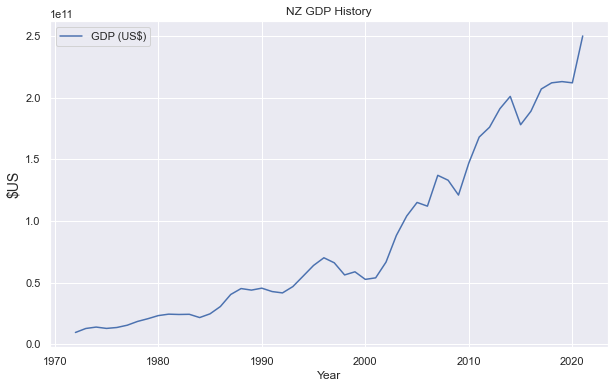

In [21]:
data.plot('Year','GDP (US$)')
plt.ylabel('$US',fontsize=14)
plt.title('NZ GDP History', fontsize=12)

In [23]:
data_growth=data[['Year','GDP growth (annual %)']]

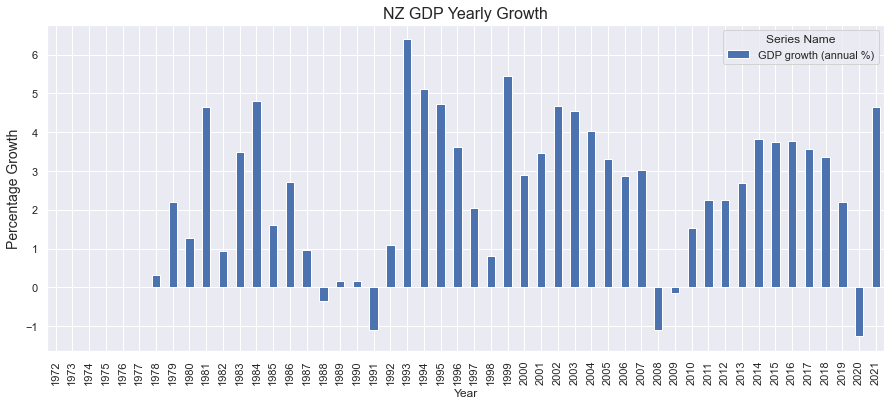

In [24]:
fig, ax = plt.subplots(figsize=(15,6))
data_growth.set_index('Year').plot(kind='bar',ax=ax)
plt.title('NZ GDP Yearly Growth', fontsize=16)
plt.ylabel('Percentage Growth',fontsize=14)
plt.show()

<AxesSubplot:xlabel='Year'>

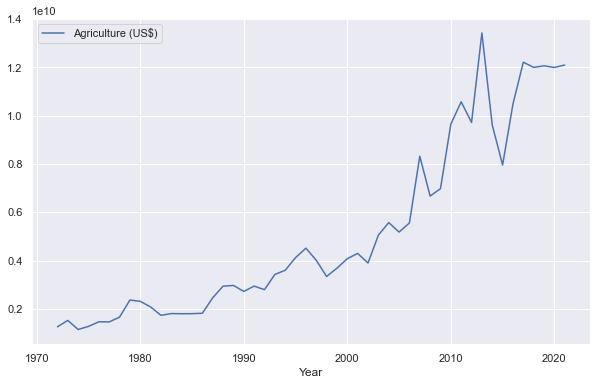

In [25]:
data.plot('Year','Agriculture (US$)')

<AxesSubplot:xlabel='Year'>

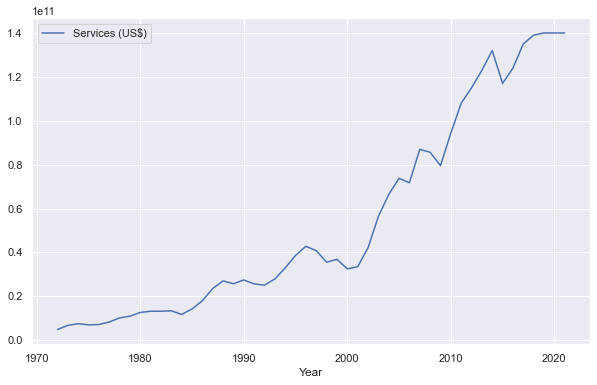

In [26]:
data.plot('Year','Services (US$)')

<AxesSubplot:xlabel='Year'>

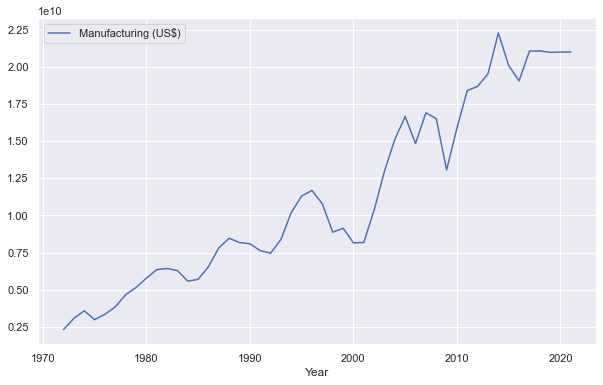

In [27]:
data.plot('Year','Manufacturing (US$)')

<AxesSubplot:xlabel='Year'>

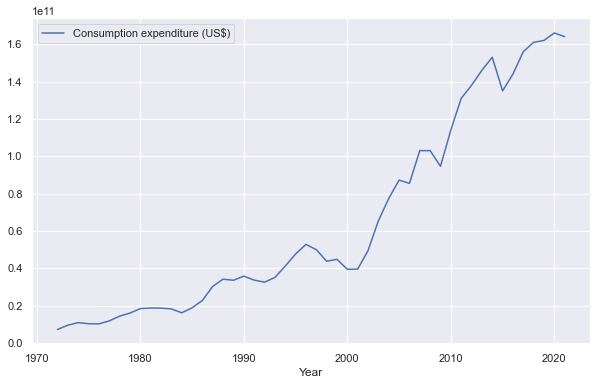

In [28]:
data.plot('Year','Consumption expenditure (US$)')

<AxesSubplot:xlabel='Year'>

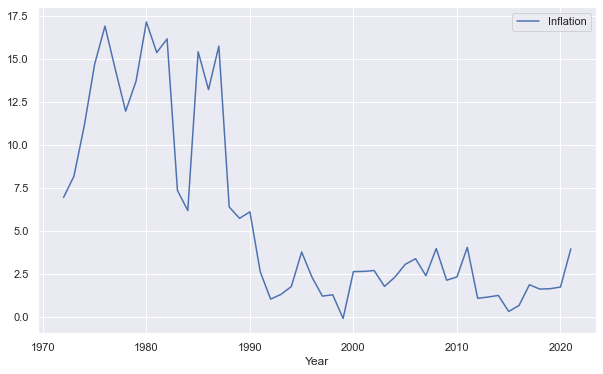

In [29]:
data.plot('Year','Inflation')

<AxesSubplot:xlabel='Year'>

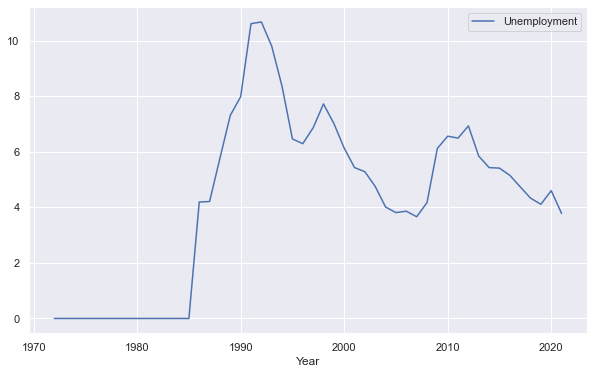

In [30]:
data.plot('Year','Unemployment')

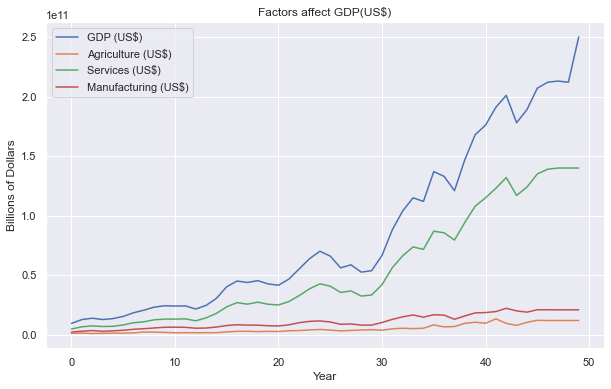

In [31]:
title = 'Factors affect GDP(US$)'
ylabel = 'Billions of Dollars'
xlabel='Year'

ax = data['GDP (US$)'].plot(legend=True,title=title)
ax.autoscale(axis='Year',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
data['Agriculture (US$)'].plot(legend=True);
data['Services (US$)'].plot(legend=True);
data['Manufacturing (US$)'].plot(legend=True);

In [32]:
# Hypothesis Test to test if the data is stationary 

In [33]:
# Ho: The data is not stationary
# H1: The data is stationary

In [34]:
# ADF statistic > 0.05: Fail to reject H0, the data  is non-stationary.
# ADF statistic < 0.05: Reject the null hypothesis H0, the data is stationary.

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
test_result=adfuller(data['GDP (US$)'])

In [37]:
test_result

(1.7287912277305877,
 0.9981968166308142,
 0,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 1870.7113040518439)

In [38]:
def adfuller_test(GDP):
    result=adfuller(GDP,autolag=None,maxlag=1)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("reject the null hypothesis,data is stationary")
        else:
            print("Fail to reject H0, data is non-stationary ")

adfuller_test(data['GDP (US$)'])

ADF Test Statistic : 1.6044841910455874
Fail to reject H0, data is non-stationary 
p-value : 0.997870966610532
Fail to reject H0, data is non-stationary 
#Lags Used : 1
Fail to reject H0, data is non-stationary 
Number of Observations : 48
Fail to reject H0, data is non-stationary 


In [39]:
# To Log transfer the data to make it stationary 

In [40]:
data['GDP_log'] = np.log(data['GDP (US$)'])

In [41]:
data['GDP_log']

0     22.981620
1     23.272889
2     23.358099
3     23.277542
4     23.333691
5     23.460669
6     23.642685
7     23.754908
8     23.869336
9     23.918571
10    23.908155
11    23.914124
12    23.799009
13    23.929251
14    24.144418
15    24.421510
16    24.533850
17    24.505641
18    24.540871
19    24.478526
20    24.452563
21    24.568628
22    24.736305
23    24.880878
24    24.973771
25    24.914058
26    24.752666
27    24.796766
28    24.686424
29    24.709885
30    24.922387
31    25.203450
32    25.367657
33    25.468198
34    25.441765
35    25.643247
36    25.613615
37    25.519056
38    25.713698
39    25.847230
40    25.893750
41    25.975539
42    26.026571
43    25.905049
44    25.965013
45    26.055985
46    26.079852
47    26.084558
48    26.079852
49    26.244727
Name: GDP_log, dtype: float64

In [42]:
adfuller_test(data['GDP_log'])

ADF Test Statistic : -0.5547996546402925
Fail to reject H0, data is non-stationary 
p-value : 0.8808719169880415
Fail to reject H0, data is non-stationary 
#Lags Used : 1
Fail to reject H0, data is non-stationary 
Number of Observations : 48
Fail to reject H0, data is non-stationary 


In [43]:
# Data still non-stationary after log transfer
# Use first order difference

In [44]:
data['GDP First Difference'] = data['GDP (US$)'] - data['GDP (US$)'].shift(1)

In [45]:
data['GDP First Difference']

0              NaN
1     3.234951e+09
2     1.138700e+09
3    -1.078999e+09
4     7.428491e+08
5     1.841993e+09
6     3.083693e+09
7     2.200725e+09
8     2.513304e+09
9     1.173070e+09
10   -2.530141e+08
11    1.446766e+08
12   -2.643304e+09
13    3.013820e+09
14    5.924873e+09
15    9.771686e+09
16    4.800458e+09
17   -1.256589e+09
18    1.574907e+09
19   -2.749800e+09
20   -1.095500e+09
21    5.125791e+09
22    8.539111e+09
23    8.603971e+09
24    6.222132e+09
25   -4.065692e+09
26   -9.847974e+09
27    2.535091e+09
28   -6.138979e+09
29    1.249144e+09
30    1.275530e+10
31    2.162316e+10
32    1.574911e+10
33    1.100000e+10
34   -3.000000e+09
35    2.500000e+10
36   -4.000000e+09
37   -1.200000e+10
38    2.600000e+10
39    2.100000e+10
40    8.000000e+09
41    1.500000e+10
42    1.000000e+10
43   -2.300000e+10
44    1.100000e+10
45    1.800000e+10
46    5.000000e+09
47    1.000000e+09
48   -1.000000e+09
49    3.800000e+10
Name: GDP First Difference, dtype: float64

In [46]:
# Data is stationary after first order difference

In [47]:
adfuller_test(data['GDP First Difference'].dropna())

ADF Test Statistic : -5.094052437271258
reject the null hypothesis,data is stationary
p-value : 1.4410221427457905e-05
reject the null hypothesis,data is stationary
#Lags Used : 1
reject the null hypothesis,data is stationary
Number of Observations : 47
reject the null hypothesis,data is stationary


Text(0.5, 1.0, 'GDP First Difference')

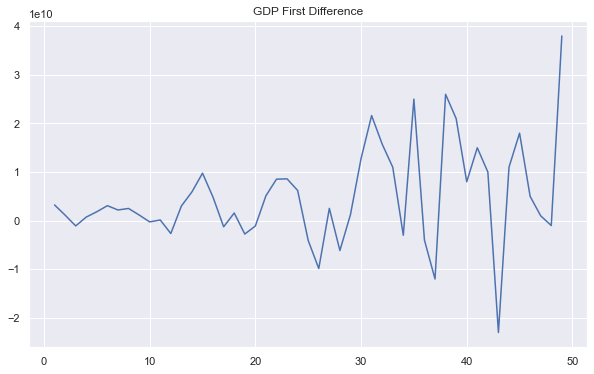

In [48]:
data['GDP First Difference'].plot()
plt.title('GDP First Difference', fontsize=12)



# Auto Regressive Model 

In [49]:
from pandas.plotting import autocorrelation_plot


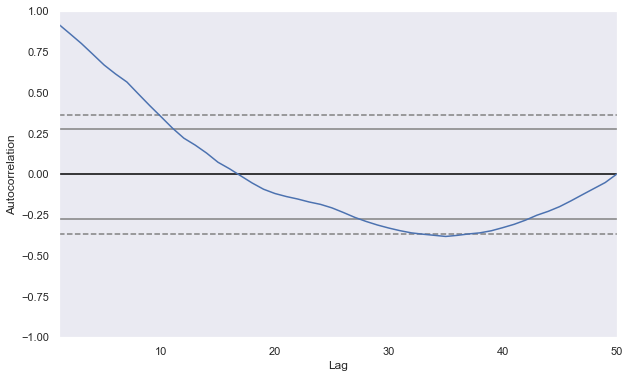

In [50]:
autocorrelation_plot(data['GDP (US$)'].dropna())
plt.show()

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
# data shows stationary after first difference

In [53]:
# ARIMA Model requires stationary data and has 3 hyper parameters (p,d,q)
# p = AR Model lags
# q = MA model lags
# d = degree of differencing

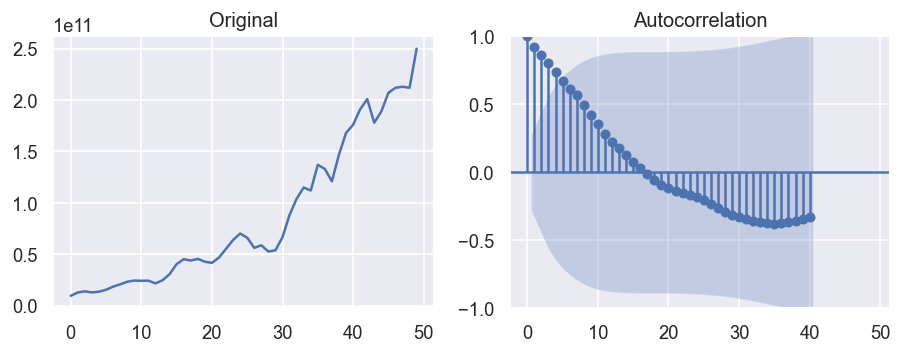

In [56]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data['GDP (US$)'].dropna())
axes[0].set_title('Original')
axes[1].set(ylim=(0,5))
plot_acf(data['GDP (US$)'].dropna(), lags=40,ax=axes[1])

plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


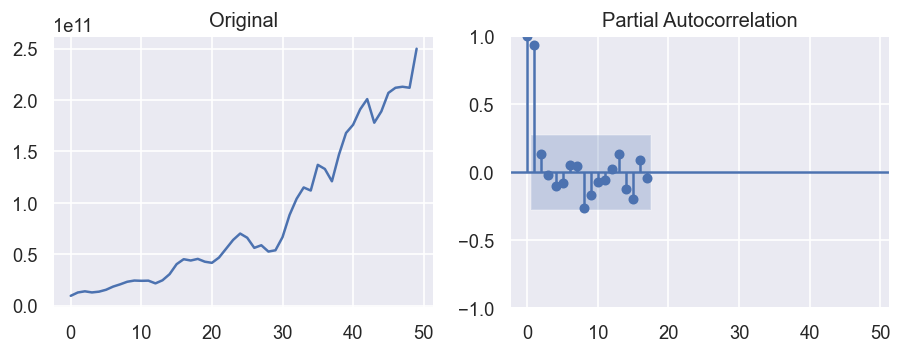

In [57]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data['GDP (US$)'].dropna())
axes[0].set_title('Original')
axes[1].set(ylim=(0,5))
plot_pacf(data['GDP (US$)'].dropna(),ax=axes[1])

plt.show()

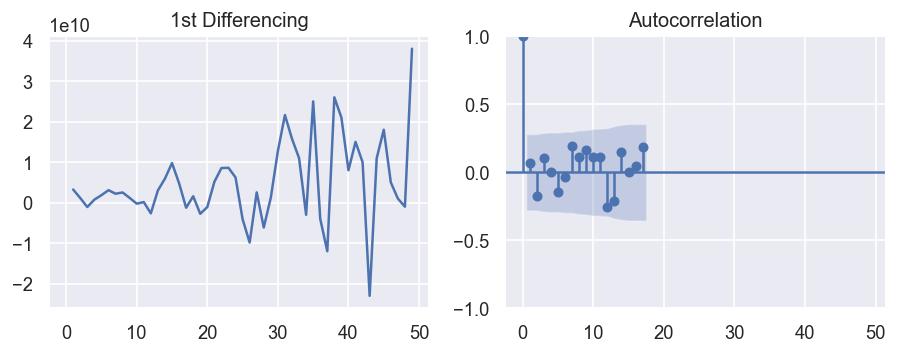

In [58]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data['GDP First Difference'].dropna())
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_acf(data['GDP First Difference'].dropna(), ax=axes[1])

plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


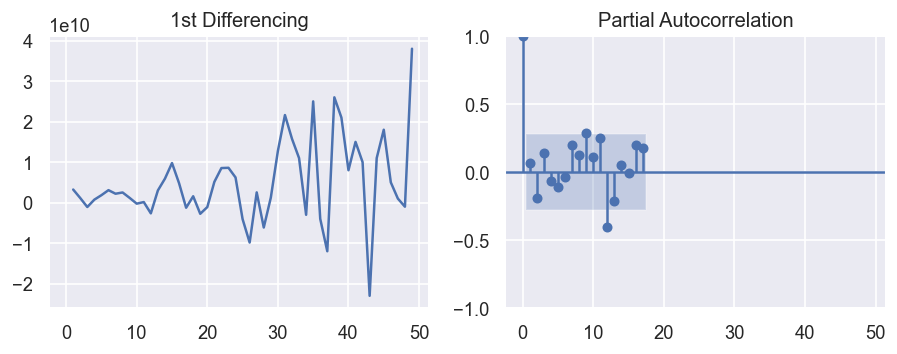

In [59]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data['GDP First Difference'].dropna())
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data['GDP First Difference'].dropna(), ax=axes[1])

plt.show()

In [60]:
# Find order of AR term (p) by using Partial Autocorrelation (PACF)plot
# Find order of MA term (q) by using Autocorrelation (ACF)plot

In [ ]:
# We can see that the PACF lag 1 is quite significant since it is well above the significance line.
# P=1
# q=1
# d=1

In [61]:
from pylab import rcParams
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import warnings
from math import sqrt

In [ ]:
# Fit with ARIMA Model 

In [62]:
model=ARIMA(data['GDP (US$)'],order=(1,1,1))
model=model.fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP (US$)   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1201.335
Date:                Fri, 21 Oct 2022   AIC                           2408.669
Time:                        23:24:27   BIC                           2414.345
Sample:                             0   HQIC                          2410.823
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4898      0.201     -2.442      0.015      -0.883      -0.097
ma.L1          0.8415      0.109      7.736      0.000       0.628       1.055
sigma2      1.304e+20   8.69e-23    1.5e+42      0.000     1.3e+20     1.3e+20
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                13.29
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              27.86   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+60. Standard errors may be unstable.
"""

In [64]:
# Cross Validation and Time Series Split

In [65]:
X = data['Year']
y = data['GDP (US$)']
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [66]:
# we use default 5 splits 
# Test data from the 42th data which is year 2014 test[42:0], train[0:42]

In [67]:
for train_index, test_index in tscv.split(X):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14 15 16 17]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18 19 20 21 22 23 24 25]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25] TEST: [26 27 28 29 30 31 32 33]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] TEST: [34 35 36 37 38 39 40 41]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41] TEST: [42 43 44 45 46 47 48 49]


In [68]:
N_SPLITS = 5

In [69]:
folds = TimeSeriesSplit(n_splits=N_SPLITS)

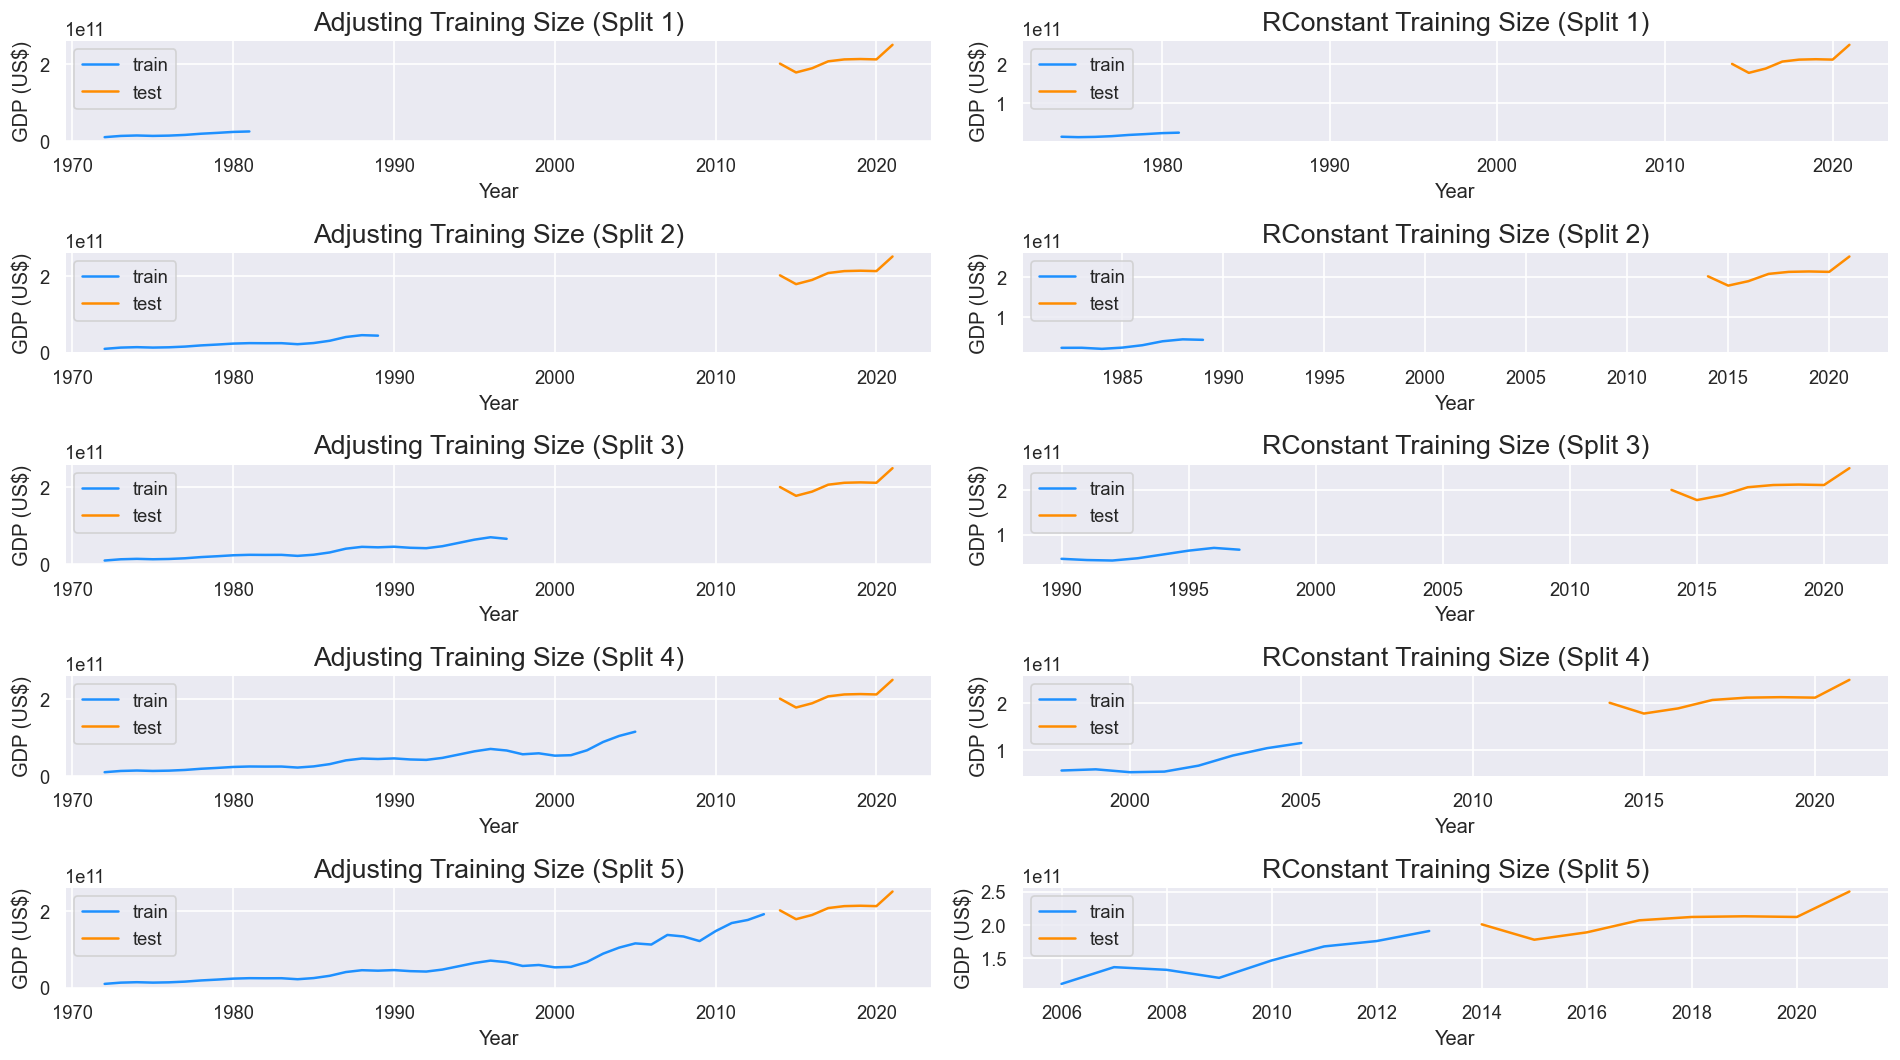

In [70]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
                 y= y_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
                 ax=ax[i,1], color='dodgerblue', label='train')
    
    for j in range(2):
        sns.lineplot(x= X_test, y= y_test, ax=ax[i, j], color='darkorange', label='test')
    ax[i, 0].set_title(f"Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"RConstant Training Size (Split {i+1})", fontsize=16)
    
for i in range(N_SPLITS):
    ax[i, 0].set_xlim()
    ax[i, 1].set_xlim()
plt.tight_layout()
plt.show()

In [71]:
# Forecasting start from the 42th data which is year 2014, without seasonal adjustment

<AxesSubplot:>

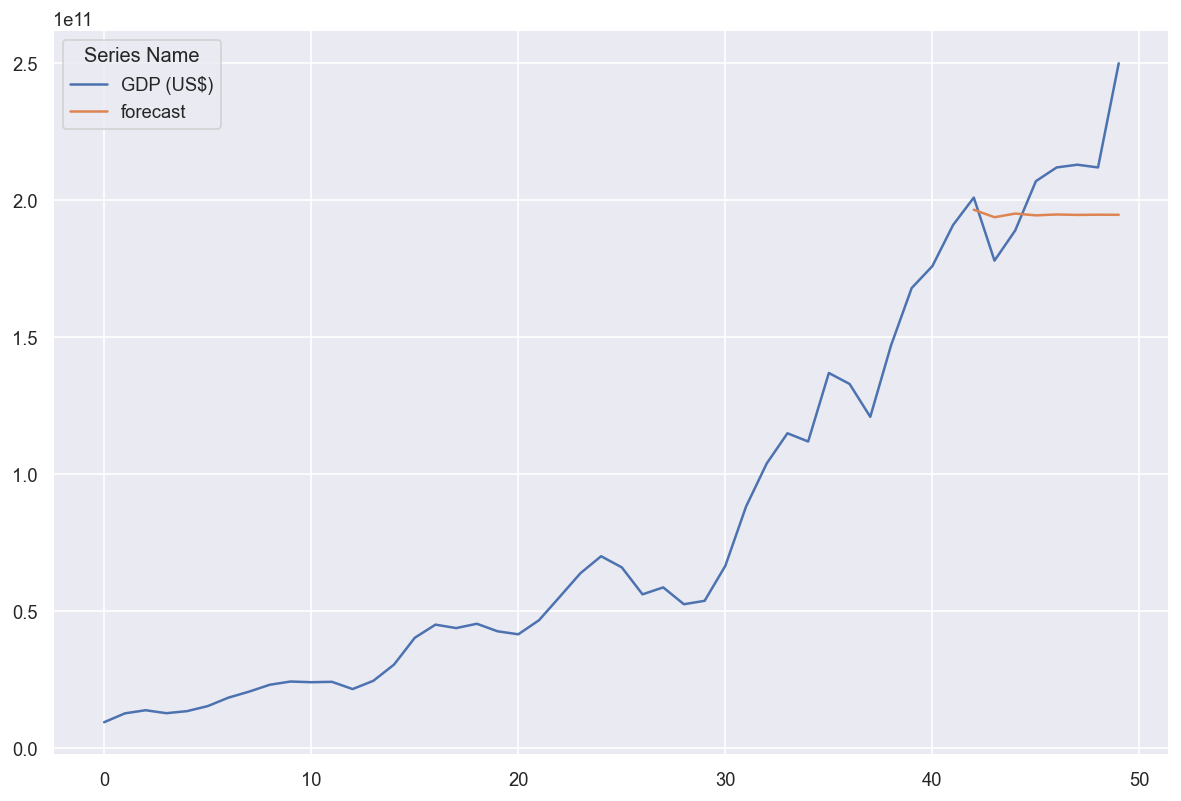

In [72]:
data['forecast']=model.predict(start=42,end=50,dynamic=True)
data[['GDP (US$)','forecast']].plot(figsize=(12,8))

In [73]:
data['GDP (US$)'].diff().iloc[44:50].values

array([ 1.1e+10,  1.8e+10,  5.0e+09,  1.0e+09, -1.0e+09,  3.8e+10])

In [74]:
model.predict(start=45,end=50)

45    1.988493e+11
46    2.050415e+11
47    2.154062e+11
48    2.104854e+11
49    2.137644e+11
50    2.618775e+11
Name: predicted_mean, dtype: float64

In [75]:
rmse = math.sqrt(mean_squared_error(data['GDP (US$)'].diff().iloc[44:50].values, model.predict(start=45,end=50)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 206022511954.03525.


In [76]:
import statsmodels.api as sm

In [ ]:
# fit with SARIMAX model, use seasonal order 4

In [77]:
model=sm.tsa.statespace.SARIMAX(data['GDP (US$)'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
model=model.fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         GDP (US$)   No. Observations:                   50
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood               -1107.370
Date:                           Fri, 21 Oct 2022   AIC                           2224.740
Time:                                   23:24:30   BIC                           2233.773
Sample:                                        0   HQIC                          2228.107
                                            - 50                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7295      0.257     -2.834      0.005      -1.234      -0.225
ma.L1          0.9633      0.175      5.496      0.000       0.620       1.307
ar.S.L4       -0.6692      0.416     -1.610      0.107      -1.484       0.145
ma.S.L4        0.0773      0.589      0.131      0.896      -1.077       1.232
sigma2      2.176e+20        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):                68.12
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):              20.96   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.14e+55. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'NZ GDP Forecasting')

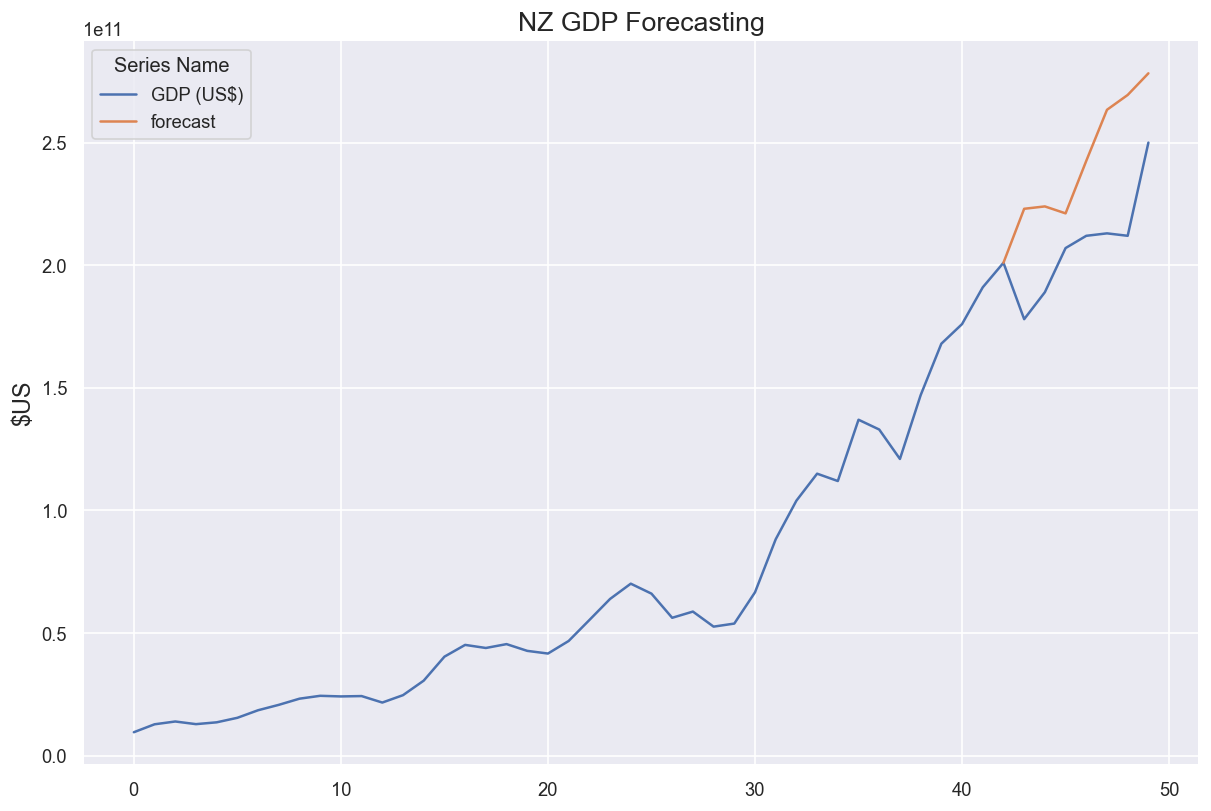

In [79]:
data['forecast']=model.predict(start=42,end=50,dynamic=True)
data[['GDP (US$)','forecast']].plot(figsize=(12,8))
plt.ylabel('$US',fontsize=14)
plt.title('NZ GDP Forecasting', fontsize=16)

# VAR Model

In [80]:
def adfuller_test(Consumption):
    result=adfuller(Consumption, autolag=None,maxlag=1)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("reject the null hypothesis,data is stationary")
        else:
            print("Fail to reject H0, data is non-stationary ")

adfuller_test(data['Consumption expenditure (US$)'])

ADF Test Statistic : 0.5900754365146053
Fail to reject H0, data is non-stationary 
p-value : 0.9873684339673342
Fail to reject H0, data is non-stationary 
#Lags Used : 1
Fail to reject H0, data is non-stationary 
Number of Observations : 48
Fail to reject H0, data is non-stationary 


In [81]:
data['Consumption First Difference'] = data['Consumption expenditure (US$)'] - data['Consumption expenditure (US$)'].shift(1)

In [82]:
data['Consumption First Difference']

0              NaN
1     2.282837e+09
2     1.381829e+09
3    -5.793013e+08
4    -7.975840e+07
5     1.571407e+09
6     2.549714e+09
7     1.632560e+09
8     2.398794e+09
9     3.398310e+08
10   -7.212810e+07
11   -4.243706e+08
12   -2.065861e+09
13    2.631697e+09
14    3.959527e+09
15    7.530434e+09
16    3.869062e+09
17   -5.773808e+08
18    2.200356e+09
19   -2.108650e+09
20   -1.131062e+09
21    2.526600e+09
22    6.071154e+09
23    6.455084e+09
24    5.194996e+09
25   -2.794128e+09
26   -6.229795e+09
27    1.042669e+09
28   -5.352626e+09
29    8.958881e+07
30    9.895974e+09
31    1.594984e+10
32    1.193834e+10
33    9.883163e+09
34   -1.752437e+09
35    1.753213e+10
36    0.000000e+00
37   -8.398214e+09
38    1.939821e+10
39    1.700000e+10
40    7.000000e+09
41    8.000000e+09
42    7.000000e+09
43   -1.800000e+10
44    9.000000e+09
45    1.200000e+10
46    5.000000e+09
47    1.000000e+09
48    4.000000e+09
49   -2.000000e+09
Name: Consumption First Difference, dtype: float64

In [83]:
# Consumption data is stationary after first order differentce 

In [84]:
adfuller_test(data['Consumption First Difference'].dropna())

ADF Test Statistic : -4.994333312930686
reject the null hypothesis,data is stationary
p-value : 2.27734494360295e-05
reject the null hypothesis,data is stationary
#Lags Used : 1
reject the null hypothesis,data is stationary
Number of Observations : 47
reject the null hypothesis,data is stationary


<AxesSubplot:>

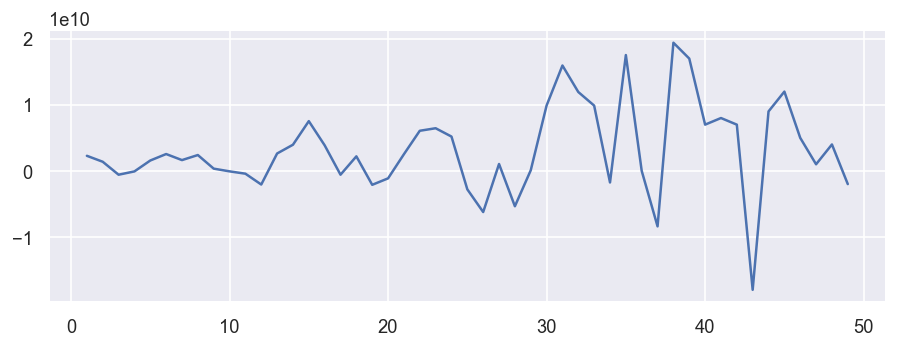

In [85]:
data['Consumption First Difference'].plot()

In [86]:
new_data = data[['GDP First Difference', 'Consumption First Difference']].copy()

In [87]:
new_data

Series Name,GDP First Difference,Consumption First Difference
0,NaN,NaN
1,3.234951e+09,2.282837e+09
2,1.138700e+09,1.381829e+09
3,-1.078999e+09,-5.793013e+08
4,7.428491e+08,-7.975840e+07
5,1.841993e+09,1.571407e+09
6,3.083693e+09,2.549714e+09
7,2.200725e+09,1.632560e+09
8,2.513304e+09,2.398794e+09
9,1.173070e+09,3.398310e+08


In [88]:
len(new_data)

50

In [89]:
nobs = 42

In [90]:
test=new_data[nobs:]

In [91]:
test

Series Name,GDP First Difference,Consumption First Difference
42,1.000000e+10,7.000000e+09
43,-2.300000e+10,-1.800000e+10
44,1.100000e+10,9.000000e+09
45,1.800000e+10,1.200000e+10
46,5.000000e+09,5.000000e+09
47,1.000000e+09,1.000000e+09
48,-1.000000e+09,4.000000e+09
49,3.800000e+10,-2.000000e+09


In [92]:
train=new_data[1:nobs]

In [93]:
train

Series Name,GDP First Difference,Consumption First Difference
1,3.234951e+09,2.282837e+09
2,1.138700e+09,1.381829e+09
3,-1.078999e+09,-5.793013e+08
4,7.428491e+08,-7.975840e+07
5,1.841993e+09,1.571407e+09
6,3.083693e+09,2.549714e+09
7,2.200725e+09,1.632560e+09
8,2.513304e+09,2.398794e+09
9,1.173070e+09,3.398310e+08
10,-2.530141e+08,-7.212810e+07


In [94]:
len(train), len(test)

(41, 8)

In [95]:
p = [1,2,3,4,5,6,7]  # try with list of 7 p values

for i in p:
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC 86.94408851779595
BIC 87.19742043591305

VAR Order 2
AIC 87.04970204537243
BIC 87.4762563136108

VAR Order 3
AIC 87.26306280918361
BIC 87.8663840259249

VAR Order 4
AIC 87.29435627917104
BIC 88.07804607451148

VAR Order 5
AIC 87.11691225821328
BIC 88.08461827615866

VAR Order 6
AIC 87.20718792836664
BIC 88.36258934547307

VAR Order 7
AIC 87.05269691824064
BIC 88.39948561643138



In [96]:
#  order 2 has least AIC value, lets select p=2 in the modelling 

In [97]:
model.endog_names

['GDP First Difference', 'Consumption First Difference']

In [98]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Oct, 2022
Time:                     23:24:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    87.4763
Nobs:                     39.0000    HQIC:                   87.2027
Log likelihood:          -1798.15    FPE:                6.40380e+37
AIC:                      87.0497    Det(Omega_mle):     5.03108e+37
--------------------------------------------------------------------
Results for equation GDP First Difference
                                       coefficient         std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                            3022891028.937475  1640109831.349976            1.843           0.065
L1.GDP First Difference                   0.913693          

In [99]:
lag_order = results.k_ar
lag_order

2

In [100]:
z = results.forecast(y=train.values[lag_order:],steps = 12)
z

array([[ 1.38414339e+10,  1.06658296e+10],
       [-6.04339370e+09, -3.57137802e+09],
       [ 1.42957021e+09,  4.82382224e+08],
       [ 7.73225113e+09,  5.68931869e+09],
       [ 3.02769682e+09,  2.65336731e+09],
       [ 3.05665423e+09,  2.29026063e+09],
       [ 5.35505969e+09,  3.98385869e+09],
       [ 4.54472677e+09,  3.55473233e+09],
       [ 4.01860004e+09,  3.09950990e+09],
       [ 4.62171040e+09,  3.50442507e+09],
       [ 4.60509129e+09,  3.53793644e+09],
       [ 4.37061749e+09,  3.36259529e+09]])

In [101]:
test

Series Name,GDP First Difference,Consumption First Difference
42,1.000000e+10,7.000000e+09
43,-2.300000e+10,-1.800000e+10
44,1.100000e+10,9.000000e+09
45,1.800000e+10,1.200000e+10
46,5.000000e+09,5.000000e+09
47,1.000000e+09,1.000000e+09
48,-1.000000e+09,4.000000e+09
49,3.800000e+10,-2.000000e+09


In [102]:
data_forecast = pd.DataFrame(z,columns=['GDP2D','Consumption2D'])

In [103]:
data_forecast

,GDP2D,Consumption2D
0,1.384143e+10,1.066583e+10
1,-6.043394e+09,-3.571378e+09
2,1.429570e+09,4.823822e+08
3,7.732251e+09,5.689319e+09
4,3.027697e+09,2.653367e+09
5,3.056654e+09,2.290261e+09
6,5.355060e+09,3.983859e+09
7,4.544727e+09,3.554732e+09
8,4.018600e+09,3.099510e+09
9,4.621710e+09,3.504425e+09


In [104]:
new_data

Series Name,GDP First Difference,Consumption First Difference
0,NaN,NaN
1,3.234951e+09,2.282837e+09
2,1.138700e+09,1.381829e+09
3,-1.078999e+09,-5.793013e+08
4,7.428491e+08,-7.975840e+07
5,1.841993e+09,1.571407e+09
6,3.083693e+09,2.549714e+09
7,2.200725e+09,1.632560e+09
8,2.513304e+09,2.398794e+09
9,1.173070e+09,3.398310e+08


In [105]:
model = VAR(train)
model = model.fit

In [106]:
data.head()

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment,GDP_log,GDP First Difference,forecast,Consumption First Difference
0,1972,9.567331e+09,0.0,1.259115e+09,4.899125e+09,2.327419e+09,7.239912e+09,6.932805,0.0,22.981620,NaN,NaN,NaN
1,1973,1.280228e+10,0.0,1.523584e+09,6.742730e+09,3.077779e+09,9.522749e+09,8.166669,0.0,23.272889,3.234951e+09,NaN,2.282837e+09
2,1974,1.394098e+10,0.0,1.148649e+09,7.534473e+09,3.582460e+09,1.090458e+10,11.109402,0.0,23.358099,1.138700e+09,NaN,1.381829e+09
3,1975,1.286198e+10,0.0,1.276259e+09,7.004744e+09,2.991868e+09,1.032528e+10,14.684983,0.0,23.277542,-1.078999e+09,NaN,-5.793013e+08
4,1976,1.360483e+10,0.0,1.467264e+09,7.162899e+09,3.353468e+09,1.024552e+10,16.906857,0.0,23.333691,7.428491e+08,NaN,-7.975840e+07


# Linear Regression Model

In [107]:
data=data.drop(['GDP_log','GDP First Difference','forecast','Consumption First Difference'], axis=1)

In [108]:
data

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9.567331e+09,0.000000,1.259115e+09,4.899125e+09,2.327419e+09,7.239912e+09,6.932805,0.00
1,1973,1.280228e+10,0.000000,1.523584e+09,6.742730e+09,3.077779e+09,9.522749e+09,8.166669,0.00
2,1974,1.394098e+10,0.000000,1.148649e+09,7.534473e+09,3.582460e+09,1.090458e+10,11.109402,0.00
3,1975,1.286198e+10,0.000000,1.276259e+09,7.004744e+09,2.991868e+09,1.032528e+10,14.684983,0.00
4,1976,1.360483e+10,0.000000,1.467264e+09,7.162899e+09,3.353468e+09,1.024552e+10,16.906857,0.00
5,1977,1.544683e+10,0.000000,1.460452e+09,8.304532e+09,3.850104e+09,1.181693e+10,14.383549,0.00
6,1978,1.853052e+10,0.318213,1.659699e+09,1.015677e+10,4.668687e+09,1.436664e+10,11.956618,0.00
7,1979,2.073124e+10,2.191586,2.367024e+09,1.094260e+10,5.157768e+09,1.599920e+10,13.699595,0.00
8,1980,2.324455e+10,1.283930,2.315190e+09,1.263077e+10,5.777842e+09,1.839799e+10,17.150545,0.00
9,1981,2.441762e+10,4.655922,2.080593e+09,1.321206e+10,6.357506e+09,1.873782e+10,15.370160,0.00


In [ ]:
# fit null value with mean

In [109]:
data['GDP growth (annual %)']=data['GDP growth (annual %)'].replace(0,data['GDP growth (annual %)'].mean())

In [110]:
data['Unemployment']=data['Unemployment'].replace(0,data['Unemployment'].mean())

In [111]:
data

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
0,1972,9.567331e+09,2.224795,1.259115e+09,4.899125e+09,2.327419e+09,7.239912e+09,6.932805,4.2766
1,1973,1.280228e+10,2.224795,1.523584e+09,6.742730e+09,3.077779e+09,9.522749e+09,8.166669,4.2766
2,1974,1.394098e+10,2.224795,1.148649e+09,7.534473e+09,3.582460e+09,1.090458e+10,11.109402,4.2766
3,1975,1.286198e+10,2.224795,1.276259e+09,7.004744e+09,2.991868e+09,1.032528e+10,14.684983,4.2766
4,1976,1.360483e+10,2.224795,1.467264e+09,7.162899e+09,3.353468e+09,1.024552e+10,16.906857,4.2766
5,1977,1.544683e+10,2.224795,1.460452e+09,8.304532e+09,3.850104e+09,1.181693e+10,14.383549,4.2766
6,1978,1.853052e+10,0.318213,1.659699e+09,1.015677e+10,4.668687e+09,1.436664e+10,11.956618,4.2766
7,1979,2.073124e+10,2.191586,2.367024e+09,1.094260e+10,5.157768e+09,1.599920e+10,13.699595,4.2766
8,1980,2.324455e+10,1.283930,2.315190e+09,1.263077e+10,5.777842e+09,1.839799e+10,17.150545,4.2766
9,1981,2.441762e+10,4.655922,2.080593e+09,1.321206e+10,6.357506e+09,1.873782e+10,15.370160,4.2766


In [112]:
data=((data-data.min())/(data.max()-data.min()))*20

In [113]:
data.corr()

Series Name,Year,GDP (US$),GDP growth (annual %),Agriculture (US$),Services (US$),Manufacturing (US$),Consumption expenditure (US$),Inflation,Unemployment
Series Name,,,,,,,,,
Year,1.000000,0.939477,0.133686,0.919170,0.941239,0.960248,0.940776,-0.757278,0.059156
GDP (US$),0.939477,1.000000,0.092832,0.979495,0.997467,0.976740,0.997349,-0.611770,-0.098728
GDP growth (annual %),0.133686,0.092832,1.000000,0.078169,0.079147,0.126202,0.067685,-0.224441,-0.080604
Agriculture (US$),0.919170,0.979495,0.078169,1.000000,0.980037,0.948276,0.981700,-0.604212,-0.063988
Services (US$),0.941239,0.997467,0.079147,0.980037,1.000000,0.979505,0.999662,-0.620029,-0.094623
Manufacturing (US$),0.960248,0.976740,0.126202,0.948276,0.979505,1.000000,0.979550,-0.664849,-0.056311
Consumption expenditure (US$),0.940776,0.997349,0.067685,0.981700,0.999662,0.979550,1.000000,-0.618481,-0.085320
Inflation,-0.757278,-0.611770,-0.224441,-0.604212,-0.620029,-0.664849,-0.618481,1.000000,-0.443222
Unemployment,0.059156,-0.098728,-0.080604,-0.063988,-0.094623,-0.056311,-0.085320,-0.443222,1.000000


Text(0.5, 1.0, 'Correlation Map')

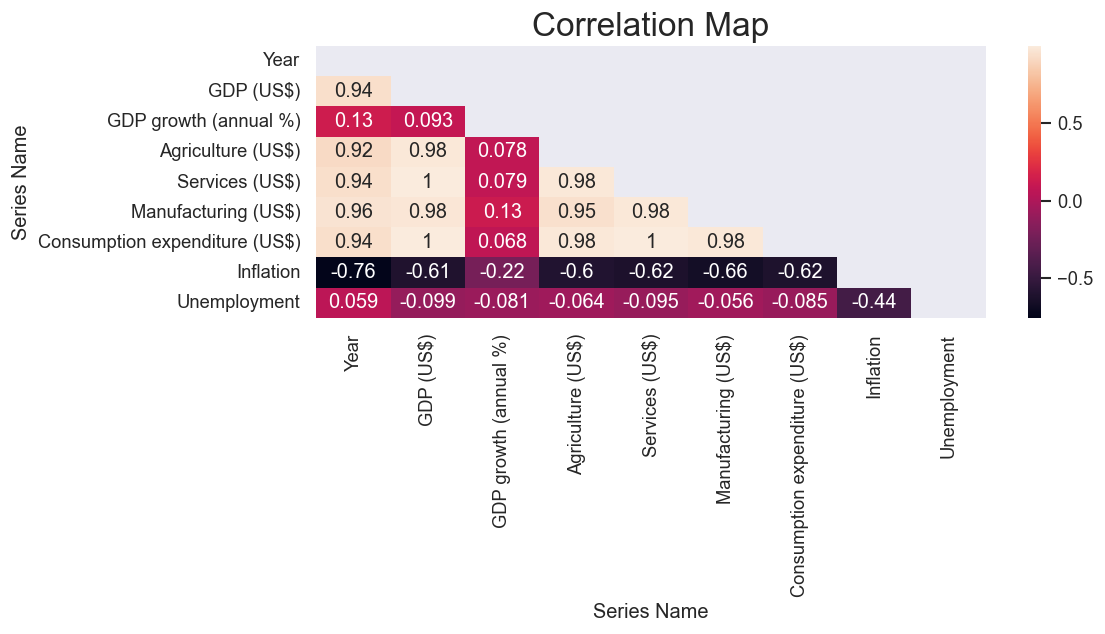

In [114]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,mask=matrix,)
plt.title('Correlation Map', fontsize = 20)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [116]:
X=data.drop(['Year','GDP (US$)','GDP growth (annual %)'],axis=1)
y=data['GDP (US$)']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [118]:
model=LinearRegression()

In [119]:
model.fit(X_train, y_train)

LinearRegression()

In [120]:
model.score(X_test, y_test)

0.9799732572414114

In [121]:
y_pred=model.predict(X_test)

In [ ]:
# Forecasting using Linear Regression

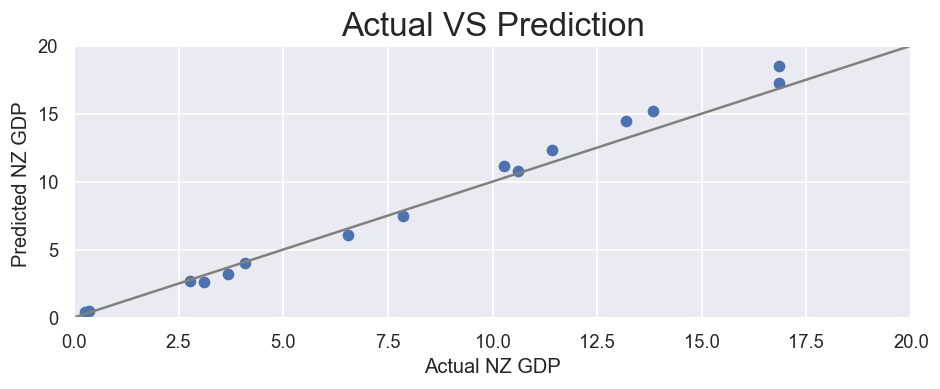

In [122]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted NZ GDP ')
plt.xlabel('Actual NZ GDP')
plt.title('Actual VS Prediction', fontsize=20)
plt.xlim(0,20)
plt.ylim(0,20)
x = np.linspace(0,50,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

In [123]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)

In [124]:
RMSE

0.7718991093391733